Will use this notebook to play around with goes lib before writting actual library

# Hello World
https://goes2go.readthedocs.io/en/latest/

The Aerosol Optical Depth at 550 nm product consists of pixels containing a dimensionless quantity representing the atmospheric absorption optical thickness due to ambient aerosol. The product is derived from ABI reflectance measurements through physical retrievals that utilize a lookup table of top of the atmosphere reflectance that is calculated from a radiative transfer model. The product is reported at 0.55 um, and 10 degree latitude band statistics are included for aerosol optical depth at 0.55 um. Product data is generated during the day.

In [1]:
from goes2go.data import goes_nearesttime

from datetime import datetime, timedelta
import pandas as pd

g = goes_nearesttime(
    datetime(2020, 12, 25, 10), satellite="goes16", product="ABI", return_as="xarray", verbose=False
)

print(g)

📦 Finished downloading [1] files to [/home/mgraca/data/noaa-goes16/ABI-L2-MCMIPC].
<xarray.Dataset> Size: 480MB
Dimensions:                                 (y: 1500, x: 2500,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2, band: 1)
Coordinates: (12/41)
    t                                       datetime64[ns] 8B 2020-12-25T10:0...
  * y                                       (y) float32 6kB 0.1282 ... 0.04427
  * x                                       (x) float32 10kB -0.1013 ... 0.03861
    y_image                                 float32 4B 0.08624
    x_image                                 float32 4B -0.03136
    band_wavelength_C01                     (band) float32 4B 0.47
    ...                                      ...
    band_id_C15                             (band) int8 1B 15
    band_id_C16                             (band) int8 1B 16
    dataset_name                            

Weirdly enough, you'll need to set verbose = False here due to some problems that jupyter notebook has with one of the emojis. Otherwise, it won't be able to save the notebook

/home/mgraca/miniconda3/envs/tf-hrrrenv/lib/python3.12/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


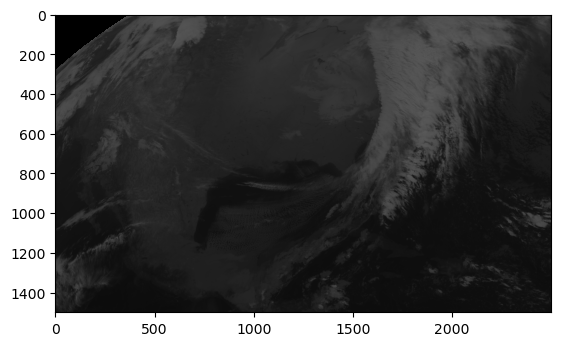

In [2]:
import matplotlib.pyplot as plt
plt.imshow(g.rgb.TrueColor())

# Ingest AOD from GOES-West
Looking for band 1 (0.47 micrometers)

In [3]:
aod = goes_nearesttime(
    datetime(2022, 12, 25, 19), # high noon christmas pst
    satellite="goes18",
    product="ABI-L2-AODC",
    return_as="xarray", 
    verbose=False
)

print(aod)

📦 Finished downloading [1] files to [/home/mgraca/data/noaa-goes18/ABI-L2-AODC].
<xarray.Dataset> Size: 75MB
Dimensions:                                                 (y: 1500, x: 2500,
                                                             number_of_time_bounds: 2,
                                                             number_of_image_bounds: 2,
                                                             number_of_sunglint_angle_bounds: 2,
                                                             number_of_LZA_bounds: 2,
                                                             number_of_SZA_bounds: 2,
                                                             land_sensor_bands: 3,
                                                             sea_sensor_bands: 4,
                                                             latitude_bands: 18,
                                                             number_of_latitude_band_bounds: 2,
                          

In [4]:
list(aod.keys())

['AOD',
 'DQF',
 'AE1',
 'AE2',
 'AE_DQF',
 'time_bounds',
 'goes_imager_projection',
 'y_image_bounds',
 'x_image_bounds',
 'nominal_satellite_subpoint_lat',
 'nominal_satellite_subpoint_lon',
 'nominal_satellite_height',
 'geospatial_lat_lon_extent',
 'sunglint_angle_bounds',
 'retrieval_local_zenith_angle_bounds',
 'quantitative_local_zenith_angle_bounds',
 'retrieval_solar_zenith_angle_bounds',
 'quantitative_solar_zenith_angle_bounds',
 'land_sensor_band_wavelengths',
 'sea_sensor_band_wavelengths',
 'land_sensor_band_ids',
 'sea_sensor_band_ids',
 'latitude_band_bounds',
 'snow_free_land_and_ice_free_sea',
 'goes_lat_lon_projection',
 'aod550_retrievals_attempted_land',
 'aod550_retrievals_attempted_sea',
 'aod550_good_LZA_retrievals_attempted',
 'aod550_outlier_pixel_count',
 'min_aod550_land',
 'max_aod550_land',
 'mean_aod550_land',
 'std_dev_aod550_land',
 'min_aod550_sea',
 'max_aod550_sea',
 'mean_aod550_sea',
 'std_dev_aod550_sea',
 'algorithm_dynamic_input_data_container'

Variable ranges, meanings: https://www.ospo.noaa.gov/resources/documents/PUG/GS%20Series%20416-R-PUG-L2%20Plus-0349%20Vol%205%20v2.4.pdf pg 282

In [5]:
aod.mean_aod550_land

<xarray.DataArray 'mean_aod550_land' ()> Size: 4B
array(0.0199121, dtype=float32)
Coordinates: (12/13)
    t                                datetime64[ns] 8B 2022-12-25T19:02:36.14...
    y_image                          float32 4B 0.08624
    x_image                          float32 4B 0.0
    sunglint_angle                   float32 4B 40.0
    retrieval_local_zenith_angle     float32 4B 90.0
    quantitative_local_zenith_angle  float32 4B 60.0
    ...                               ...
    quantitative_solar_zenith_angle  float32 4B 80.0
    aod_product_wavelength           float32 4B 0.55
    dataset_name                     <U72 288B 'OR_ABI-L2-AODC-M6_G18_s202235...
    date_created                     <U22 88B '2022-12-25T19:06:20.0Z'
    time_coverage_start              <U22 88B '2022-12-25T19:01:17.5Z'
    time_coverage_end                <U22 88B '2022-12-25T19:03:54.7Z'
Attributes:
    long_name:      mean ABI L2+ Aerosol Optical Depth at 550 nm over land
    standard_name:  atmosphere_extinction_optical_thickness_due_to_ambient_ae...
    valid_range:    [-0.05  5.  ]
    units:          1
    grid_mapping:   goes_imager_projection
    cell_methods:   retrieval_local_zenith_angle: sum quantitative_solar_zeni...

In [6]:
aod.DQF

<xarray.DataArray 'DQF' (y: 1500, x: 2500)> Size: 15MB
array([[nan, nan, nan, ...,  3.,  3.,  3.],
       [nan, nan, nan, ...,  3.,  3.,  3.],
       [nan, nan, nan, ...,  3.,  3.,  3.],
       ...,
       [ 3.,  3.,  3., ...,  2.,  3.,  3.],
       [ 3.,  3.,  3., ...,  3.,  3.,  3.],
       [ 3.,  3.,  3., ...,  2.,  2.,  2.]], dtype=float32)
Coordinates: (12/15)
    t                                datetime64[ns] 8B 2022-12-25T19:02:36.14...
  * y                                (y) float32 6kB 0.1282 0.1282 ... 0.04427
  * x                                (x) float32 10kB -0.06997 ... 0.06997
    y_image                          float32 4B 0.08624
    x_image                          float32 4B 0.0
    sunglint_angle                   float32 4B 40.0
    ...                               ...
    quantitative_solar_zenith_angle  float32 4B 80.0
    aod_product_wavelength           float32 4B 0.55
    dataset_name                     <U72 288B 'OR_ABI-L2-AODC-M6_G18_s202235...
    date_created                     <U22 88B '2022-12-25T19:06:20.0Z'
    time_coverage_start              <U22 88B '2022-12-25T19:01:17.5Z'
    time_coverage_end                <U22 88B '2022-12-25T19:03:54.7Z'
Attributes: (12/13)
    long_name:                            ABI L2+ Aerosol Optical Depth at 55...
    standard_name:                        status_flag
    valid_range:                          [0 3]
    units:                                1
    grid_mapping:                         goes_imager_projection
    cell_methods:                         sunglint_angle: point (no retrieval...
    ...                                   ...
    flag_meanings:                        high_quality_retrieval_qf medium_qu...
    number_of_qf_values:                  4
    percent_high_quality_retrieval_qf:    0.1151315
    percent_medium_quality_retrieval_qf:  0.0551448
    percent_low_quality_retrieval_qf:     0.0827773
    percent_no_retrieval_qf:              0.7293715

In [7]:
aod.AOD

<xarray.DataArray 'AOD' (y: 1500, x: 2500)> Size: 15MB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 0.53357536,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ..., 0.25392464, 0.5264088 ,
        0.50567967]], dtype=float32)
Coordinates: (12/15)
    t                                datetime64[ns] 8B 2022-12-25T19:02:36.14...
  * y                                (y) float32 6kB 0.1282 0.1282 ... 0.04427
  * x                                (x) float32 10kB -0.06997 ... 0.06997
    y_image                          float32 4B 0.08624
    x_image                          float32 4B 0.0
    sunglint_angle                   float32 4B 40.0
    ...                               ...
    quantitative_solar_zenith_angle  float32 4B 80.0
    aod_product_wavelength           float32 4B 0.55
    dataset_name                     <U72 288B 'OR_ABI-L2-AODC-M6_G18_s202235...
    date_created                     <U22 88B '2022-12-25T19:06:20.0Z'
    time_coverage_start              <U22 88B '2022-12-25T19:01:17.5Z'
    time_coverage_end                <U22 88B '2022-12-25T19:03:54.7Z'
Attributes:
    long_name:            ABI L2+ Aerosol Optical Depth at 550 nm
    standard_name:        atmosphere_extinction_optical_thickness_due_to_ambi...
    valid_range:          [    0 65530]
    units:                1
    resolution:           y: 0.000056 rad x: 0.000056 rad
    grid_mapping:         goes_imager_projection
    cell_methods:         sunglint_angle: point (no pixel produced over sea o...
    ancillary_variables:  DQF

## Figuring out how to plot stuff

In [8]:
aod.FOV.crs

<Projected CRS: +proj=geos +a=6378137.0 +b=6356752.31414 +rf=298.2 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Geostationary Satellite (Sweep X)
Datum: Unknown based on GRS 1980 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
aod.FOV.crs.to_string()

'+proj=geos +a=6378137.0 +b=6356752.31414 +rf=298.2572221 +lon_0=-137.0 +lat_0=0.0 +h=35786023.0 +x_0=0 +y_0=0 +units=m +sweep=x +no_defs +type=crs'

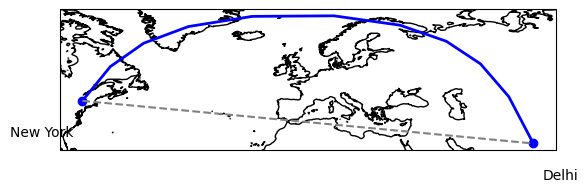

In [10]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

latitude=34.052235, 
longitude=-118.243683,


ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

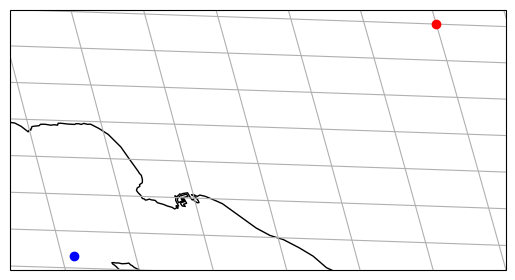

In [11]:
# Define bounding box
lat_bottom, lat_top = 33.5, 34.5
lon_bottom, lon_top = -118.75, -117.0
extent = (lon_bottom, lon_top, lat_bottom, lat_top)

ax = plt.axes(projection=aod.FOV.crs)
ax.coastlines()
ax.gridlines()
ax.set_extent(extents=extent, crs=ccrs.PlateCarree())
#ax.set_global()
plt.plot([lon_bottom], [lat_bottom], color='blue', marker='o', transform=ccrs.PlateCarree())
plt.plot([lon_top], [lat_top], color='red', marker='o', transform=ccrs.PlateCarree())

plt.show()

In [12]:
aod.AOD

<xarray.DataArray 'AOD' (y: 1500, x: 2500)> Size: 15MB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 0.53357536,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ..., 0.25392464, 0.5264088 ,
        0.50567967]], dtype=float32)
Coordinates: (12/15)
    t                                datetime64[ns] 8B 2022-12-25T19:02:36.14...
  * y                                (y) float32 6kB 0.1282 0.1282 ... 0.04427
  * x                                (x) float32 10kB -0.06997 ... 0.06997
    y_image                          float32 4B 0.08624
    x_image                          float32 4B 0.0
    sunglint_angle                   float32 4B 40.0
    ...                               ...
    quantitative_solar_zenith_angle  float32 4B 80.0
    aod_product_wavelength           float32 4B 0.55
    dataset_name                     <U72 288B 'OR_ABI-L2-AODC-M6_G18_s202235...
    date_created                     <U22 88B '2022-12-25T19:06:20.0Z'
    time_coverage_start              <U22 88B '2022-12-25T19:01:17.5Z'
    time_coverage_end                <U22 88B '2022-12-25T19:03:54.7Z'
Attributes:
    long_name:            ABI L2+ Aerosol Optical Depth at 550 nm
    standard_name:        atmosphere_extinction_optical_thickness_due_to_ambi...
    valid_range:          [    0 65530]
    units:                1
    resolution:           y: 0.000056 rad x: 0.000056 rad
    grid_mapping:         goes_imager_projection
    cell_methods:         sunglint_angle: point (no pixel produced over sea o...
    ancillary_variables:  DQF

## Plotting the AOD

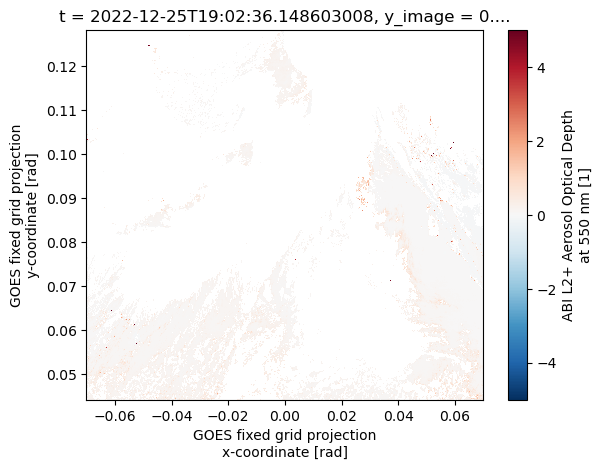

In [13]:
aod.AOD.plot() # just raw plotting it with xarray
plt.show()

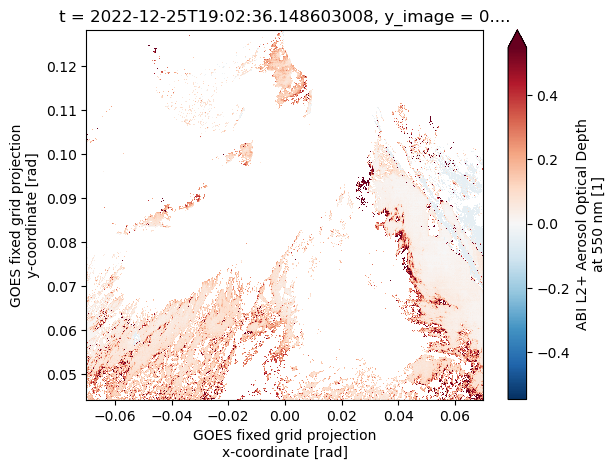

In [14]:
aod.AOD.plot(robust=True) # shaves off smallest/largest 2%
plt.show()

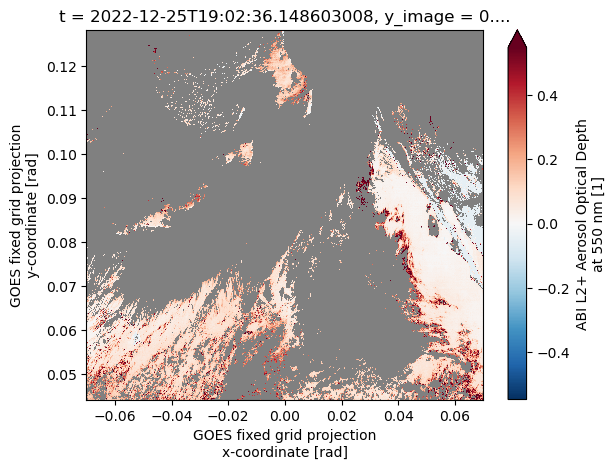

In [15]:
aod.AOD.plot(
    subplot_kws=dict(facecolor='gray'),
    robust=True,
)
plt.show()

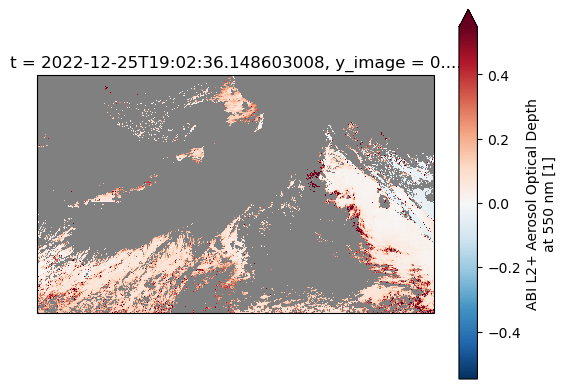

In [16]:
aod.AOD.plot(
    robust=True, 
    subplot_kws=dict(
        projection=ccrs.PlateCarree(), 
        facecolor='gray'
    )
)
plt.show()

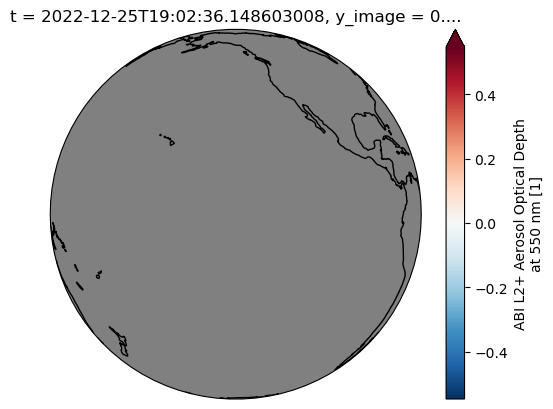

In [17]:
p = aod.AOD.plot(
    robust=True,
    subplot_kws=dict(projection=aod.FOV.crs, facecolor="gray"),
    transform=ccrs.PlateCarree(),
)
p.axes.set_global()

p.axes.coastlines()
plt.show()

https://www.star.nesdis.noaa.gov/atmospheric-composition-training/python_abi_lat_lon.php use this to calc lat lon and set extents???

https://gist.github.com/barronh/b63731fed5cf4fd5c2d79d5545353920 maybe our savior

https://github.com/blaylockbk/pyBKB_v3/blob/master/BB_GOES/mapping_GOES16_TrueColor.ipynb

## Now let's see if we can put it all together

In [18]:
# download -> xarray
ds = goes_nearesttime(
    datetime(2022, 12, 25, 19), # high noon christmas pst
    satellite="goes18",
    product="ABI-L2-AODC",
    return_as="xarray", 
    verbose=False
)

print(ds)

📦 Finished downloading [1] files to [/home/mgraca/data/noaa-goes18/ABI-L2-AODC].
<xarray.Dataset> Size: 75MB
Dimensions:                                                 (y: 1500, x: 2500,
                                                             number_of_time_bounds: 2,
                                                             number_of_image_bounds: 2,
                                                             number_of_sunglint_angle_bounds: 2,
                                                             number_of_LZA_bounds: 2,
                                                             number_of_SZA_bounds: 2,
                                                             land_sensor_bands: 3,
                                                             sea_sensor_bands: 4,
                                                             latitude_bands: 18,
                                                             number_of_latitude_band_bounds: 2,
                          

In [19]:
crs_geo = ds.FOV.crs
crs_pc = ccrs.PlateCarree()
crs_geo

<Projected CRS: +proj=geos +a=6378137.0 +b=6356752.31414 +rf=298.2 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Geostationary Satellite (Sweep X)
Datum: Unknown based on GRS 1980 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [20]:
crs_pc

<Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
# convert "radians" to "x"
# x: fixed grid E/W scanning angle, in radians
# y: fixed grid N/S elevation angle, in radians
h = ds['goes_imager_projection'].attrs['perspective_point_height']
print(h) # how far the sat is above the Earth, in km
ds.coords['x'] = ds.coords['x'] * h
ds.coords['y'] = ds.coords['y'] * h

35786023.0


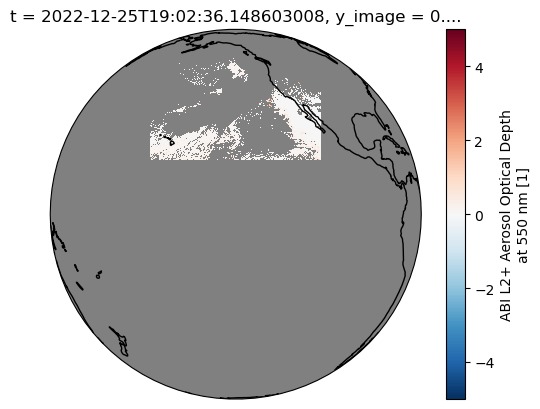

In [22]:
p = ds['AOD'].plot(
    subplot_kws=dict(projection=crs_geo, facecolor="gray"),
    transform=crs_geo,
)
p.axes.set_global()
p.axes.coastlines()
plt.show()

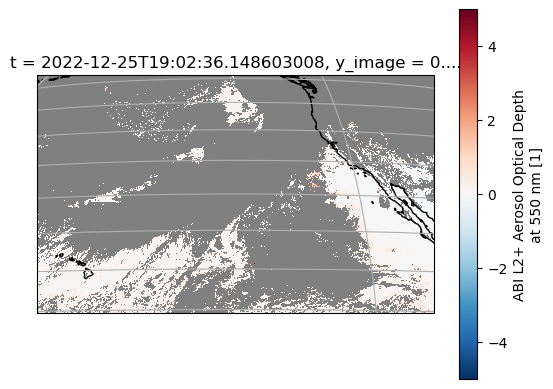

In [23]:
p = ds['AOD'].plot(
    subplot_kws=dict(projection=crs_geo, facecolor="gray"),
    transform=crs_geo,
)
p.axes.gridlines(crs=crs_pc)
p.axes.coastlines()
plt.show()

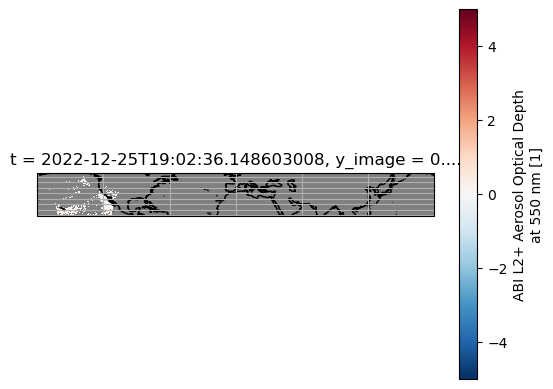

In [24]:
p = ds['AOD'].plot(
    subplot_kws=dict(projection=crs_pc, facecolor="gray"),
    transform=crs_geo,
)
p.axes.gridlines(crs=crs_pc)
p.axes.coastlines()
plt.show()

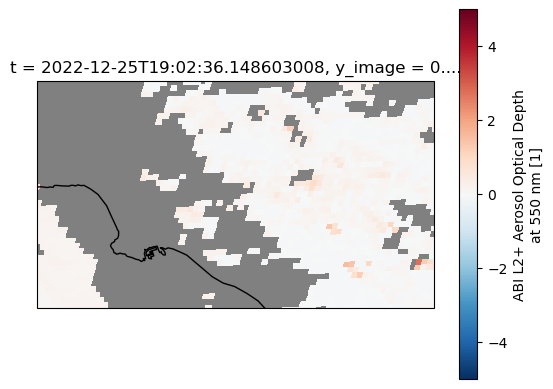

In [25]:
p = ds['AOD'].plot(
    subplot_kws=dict(projection=crs_pc, facecolor="gray"),
    transform=crs_geo,
)
p.axes.coastlines()
p.axes.set_extent(extents=extent, crs=crs_pc)
plt.show()


## Another projection

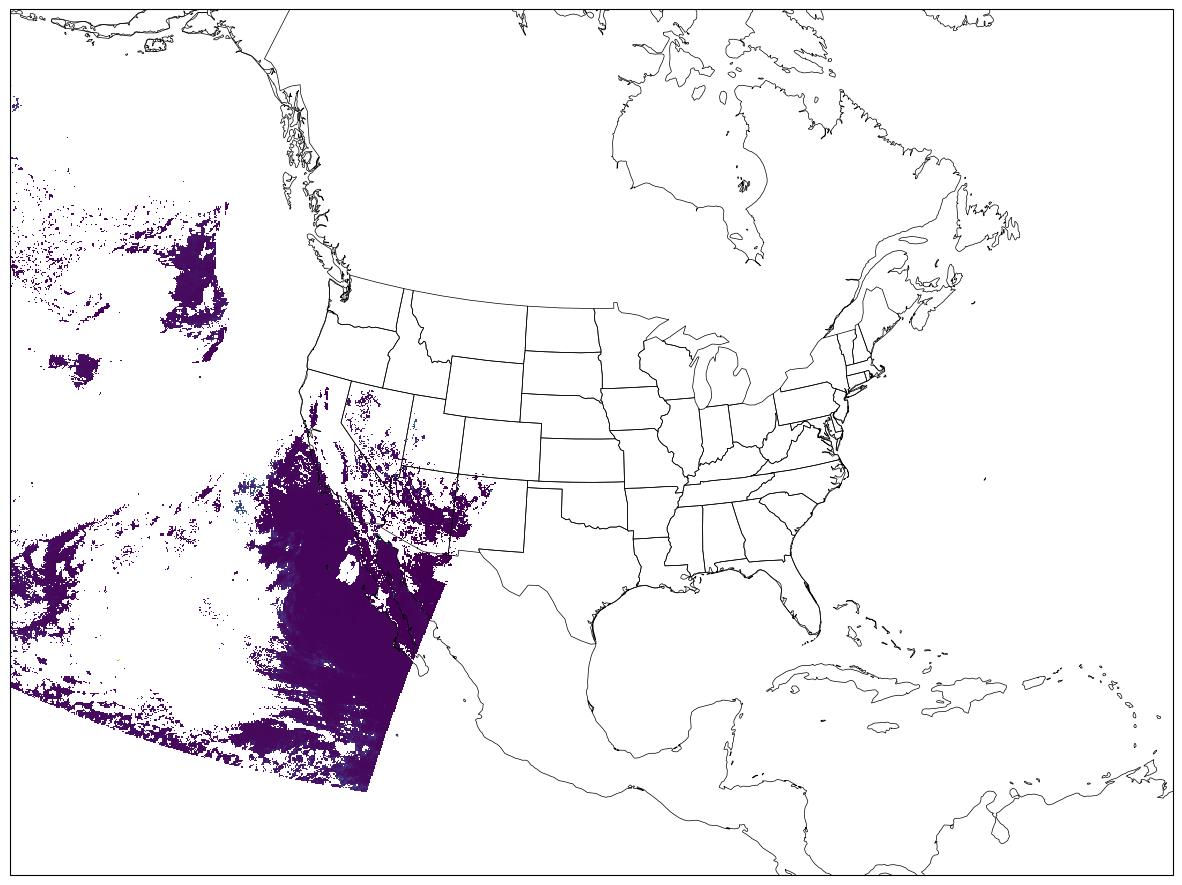

In [26]:
fig = plt.figure(figsize=(15, 12))

# Generate an Cartopy projection
lc = ccrs.LambertConformal(central_longitude=-97.5,
                           standard_parallels=(38.5, 38.5))

x, y = ds['x'], ds['y']

ax = fig.add_subplot(1, 1, 1, projection=lc)
ax.set_extent([-135, -60, 10, 65], crs=ccrs.PlateCarree())

ax.imshow(ds['AOD'], origin='upper',
          extent=(x.min(), x.max(), y.min(), y.max()),
          transform=crs_geo,
          interpolation='none')
ax.coastlines(resolution='50m', color='black', linewidth=0.5)
ax.add_feature(ccrs.cartopy.feature.STATES, linewidth=0.5);

# Final: plotting it in one package

In [27]:
ds = goes_nearesttime(
    datetime(2022, 12, 25, 19), # high noon christmas pst
    satellite="goes18",
    product="ABI-L2-AODC",
    return_as="xarray", 
    verbose=False
)

crs_geo = ds.FOV.crs
crs_pc = ccrs.PlateCarree()

sat_height = ds['goes_imager_projection'].attrs['perspective_point_height']
ds.coords['x'] = ds.coords['x'] * sat_height
ds.coords['y'] = ds.coords['y'] * sat_height

📦 Finished downloading [1] files to [/home/mgraca/data/noaa-goes18/ABI-L2-AODC].


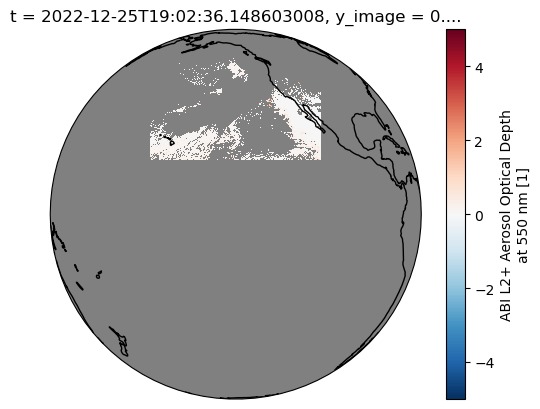

In [28]:
# global
p = ds['AOD'].plot(
    subplot_kws=dict(projection=crs_geo, facecolor="gray"),
    transform=crs_geo,
)
p.axes.set_global()
p.axes.coastlines()
plt.show()

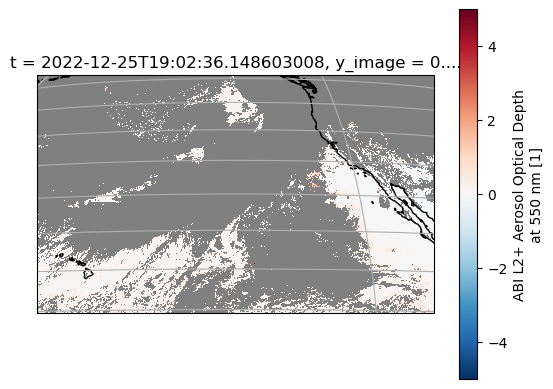

In [29]:
# with extent
p = ds['AOD'].plot(
    subplot_kws=dict(projection=crs_geo, facecolor="gray"),
    transform=crs_geo,
)
p.axes.gridlines(crs=crs_pc)
p.axes.coastlines()
plt.show()

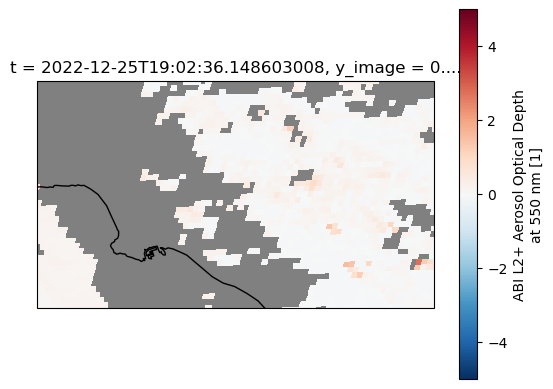

In [30]:
# LA extent
p = ds['AOD'].plot(
    subplot_kws=dict(projection=crs_pc, facecolor="gray"),
    transform=crs_geo,
)
p.axes.coastlines()
p.axes.set_extent(extents=extent, crs=crs_pc)
plt.show()

# Dealing with coordinates
Okay so the plan here can be to:
1. Convert x, y to lat, lon
2. Subset using lat, lon
3. Use the indices found by subsetting lat, lon and apply that to the data
    - e.g. for la, maybe the indeces are (0,0), ...
    - Those indices are unitless, and map directly to their location in the original coordinates (radians)!

https://www.star.nesdis.noaa.gov/atmospheric-composition-training/python_abi_lat_lon.php

https://gist.github.com/barronh/b63731fed5cf4fd5c2d79d5545353920

https://unidata.github.io/python-training/gallery/mapping_goes16_truecolor/

In [31]:
# not sure why ds.FOV.get_latlon() doesn't work since this is the same thing
import numpy as np
def get_latlon(ds):
    """Get lat/lon of all points. Modifies original xarray to contain lat/lon"""
    X, Y = np.meshgrid(ds.x, ds.y)
    a = ccrs.PlateCarree().transform_points(ds.FOV.crs, X, Y)
    lons, lats, _ = a[:, :, 0], a[:, :, 1], a[:, :, 2]

    ds.coords["lon"] = (("y", "x"), lons)
    ds.coords["lat"] = (("y", "x"), lats)
    return ds["lat"], ds["lon"]

get_latlon(ds)

(<xarray.DataArray 'lat' (y: 1500, x: 2500)> Size: 30MB
 array([[53.50007237, 53.49294721, 53.48584708, ..., 53.48584708,
         53.49294721, 53.50007237],
        [53.45287588, 53.44579517, 53.43873918, ..., 53.43873918,
         53.44579517, 53.45287588],
        [53.40581095, 53.3987741 , 53.39176164, ..., 53.39176164,
         53.3987741 , 53.40581095],
        ...,
        [14.84405096, 14.84364174, 14.84323298, ..., 14.84323298,
         14.84364174, 14.84405096],
        [14.82461453, 14.82420594, 14.82379781, ..., 14.82379781,
         14.82420594, 14.82461453],
        [14.80517973, 14.80477178, 14.80436427, ..., 14.80436427,
         14.80477178, 14.80517973]])
 Coordinates: (12/17)
     t                                datetime64[ns] 8B 2022-12-25T19:02:36.14...
     y_image                          float32 4B 0.08624
     x_image                          float32 4B 0.0
     sunglint_angle                   float32 4B 40.0
     retrieval_local_zenith_angle     float32 4B 9

In [32]:
ds.coords['lon']

<xarray.DataArray 'lon' (y: 1500, x: 2500)> Size: 30MB
array([[ 175.62355484,  175.68967766,  175.75562953, ...,  -89.75562953,
         -89.68967766,  -89.62355484],
       [ 175.7036199 ,  175.76944927,  175.83510988, ...,  -89.83510988,
         -89.76944927,  -89.7036199 ],
       [ 175.78309882,  175.84863877,  175.9140121 , ...,  -89.9140121 ,
         -89.84863877,  -89.78309882],
       ...,
       [-161.57509203, -161.55330057, -161.53151511, ..., -112.46848489,
        -112.44669943, -112.42490797],
       [-161.5722372 , -161.55044887, -161.52866655, ..., -112.47133345,
        -112.44955113, -112.4277628 ],
       [-161.56938685, -161.54760165, -161.52582246, ..., -112.47417754,
        -112.45239835, -112.43061315]])
Coordinates: (12/17)
    t                                datetime64[ns] 8B 2022-12-25T19:02:36.14...
    y_image                          float32 4B 0.08624
    x_image                          float32 4B 0.0
    sunglint_angle                   float32 4B 40.0
    retrieval_local_zenith_angle     float32 4B 90.0
    quantitative_local_zenith_angle  float32 4B 60.0
    ...                               ...
    time_coverage_start              <U22 88B '2022-12-25T19:01:17.5Z'
    time_coverage_end                <U22 88B '2022-12-25T19:03:54.7Z'
  * x                                (x) float32 10kB -2.504e+06 ... 2.504e+06
  * y                                (y) float32 6kB 4.588e+06 ... 1.584e+06
    lon                              (y, x) float64 30MB 175.6 175.7 ... -112.4
    lat                              (y, x) float64 30MB 53.5 53.49 ... 14.81

In [33]:
ds

<xarray.Dataset> Size: 135MB
Dimensions:                                                 (y: 1500, x: 2500,
                                                             number_of_time_bounds: 2,
                                                             number_of_image_bounds: 2,
                                                             number_of_sunglint_angle_bounds: 2,
                                                             number_of_LZA_bounds: 2,
                                                             number_of_SZA_bounds: 2,
                                                             land_sensor_bands: 3,
                                                             sea_sensor_bands: 4,
                                                             latitude_bands: 18,
                                                             number_of_latitude_band_bounds: 2,
                                                             num_area_types: 2)
Coordinates: (12/18)
    t                                                       datetime64[ns] 8B ...
    y_image                                                 float32 4B 0.08624
    x_image                                                 float32 4B 0.0
    sunglint_angle                                          float32 4B 40.0
    retrieval_local_zenith_angle                            float32 4B 90.0
    quantitative_local_zenith_angle                         float32 4B 60.0
    ...                                                      ...
    time_coverage_start                                     <U22 88B '2022-12...
    time_coverage_end                                       <U22 88B '2022-12...
  * x                                                       (x) float32 10kB ...
  * y                                                       (y) float32 6kB 4...
    lon                                                     (y, x) float64 30MB ...
    lat                                                     (y, x) float64 30MB ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_sunglint_angle_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                land_sensor_bands, sea_sensor_bands,
                                number_of_latitude_band_bounds, num_area_types
Data variables: (12/63)
    AOD                                                     (y, x) float32 15MB ...
    DQF                                                     (y, x) float32 15MB ...
    AE1                                                     (y, x) float32 15MB ...
    AE2                                                     (y, x) float32 15MB ...
    AE_DQF                                                  (y, x) float32 15MB ...
    time_bounds                                             (number_of_time_bounds) datetime64[ns] 16B ...
    ...                                                      ...
    lat_band_max_aod550_sea                                 (latitude_bands) float32 72B ...
    lat_band_mean_aod550_sea                                (latitude_bands) float32 72B ...
    lat_band_std_dev_aod550_sea                             (latitude_bands) float32 72B ...
    percent_uncorrectable_GRB_errors                        float32 4B 0.0
    percent_uncorrectable_L0_errors                         float32 4B 0.0
    filename                                                <U108 432B 'noaa-...
Attributes: (12/26)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    processing_level:          National Aeronautics and Space Administration ...
    cdm_data_typ

In [34]:
sub_ds = ds.where(
    (ds.coords['lon'] >= lon_bottom) &
    (ds.coords['lon'] <= lon_top) &
    (ds.coords['lat'] >= lat_bottom) &
    (ds.coords['lat'] <= lat_top),
    drop=True
)

sub_ds

<xarray.Dataset> Size: 8MB
Dimensions:                                                 (y: 44, x: 82,
                                                             number_of_time_bounds: 2,
                                                             number_of_image_bounds: 2,
                                                             number_of_sunglint_angle_bounds: 2,
                                                             number_of_LZA_bounds: 2,
                                                             number_of_SZA_bounds: 2,
                                                             land_sensor_bands: 3,
                                                             sea_sensor_bands: 4,
                                                             latitude_bands: 18,
                                                             number_of_latitude_band_bounds: 2,
                                                             num_area_types: 2)
Coordinates: (12/18)
    t                                                       datetime64[ns] 8B ...
    y_image                                                 float32 4B 0.08624
    x_image                                                 float32 4B 0.0
    sunglint_angle                                          float32 4B 40.0
    retrieval_local_zenith_angle                            float32 4B 90.0
    quantitative_local_zenith_angle                         float32 4B 60.0
    ...                                                      ...
    time_coverage_start                                     <U22 88B '2022-12...
    time_coverage_end                                       <U22 88B '2022-12...
  * x                                                       (x) float32 328B ...
  * y                                                       (y) float32 176B ...
    lon                                                     (y, x) float64 29kB ...
    lat                                                     (y, x) float64 29kB ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_sunglint_angle_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                land_sensor_bands, sea_sensor_bands,
                                number_of_latitude_band_bounds, num_area_types
Data variables: (12/63)
    AOD                                                     (y, x) float32 14kB ...
    DQF                                                     (y, x) float32 14kB ...
    AE1                                                     (y, x) float32 14kB ...
    AE2                                                     (y, x) float32 14kB ...
    AE_DQF                                                  (y, x) float32 14kB ...
    time_bounds                                             (number_of_time_bounds, y, x) datetime64[ns] 58kB ...
    ...                                                      ...
    lat_band_max_aod550_sea                                 (latitude_bands, y, x) float32 260kB ...
    lat_band_mean_aod550_sea                                (latitude_bands, y, x) float32 260kB ...
    lat_band_std_dev_aod550_sea                             (latitude_bands, y, x) float32 260kB ...
    percent_uncorrectable_GRB_errors                        (y, x) float32 14kB ...
    percent_uncorrectable_L0_errors                         (y, x) float32 14kB ...
    filename                                                (y, x) object 29kB ...
Attributes: (12/26)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    processing_level:          National Aeronautics 

In [35]:
sub_ds.AOD.data.shape

(44, 82)

In [36]:
sub_ds.AOD.data

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ..., -0.04522228,
        -0.0222584 ,  0.02775354],
       [        nan,         nan,         nan, ...,  0.03021946,
         0.02467114,  0.03484306],
       [        nan,         nan,         nan, ...,  0.0447838 ,
         0.04802032,  0.06227642]], dtype=float32)

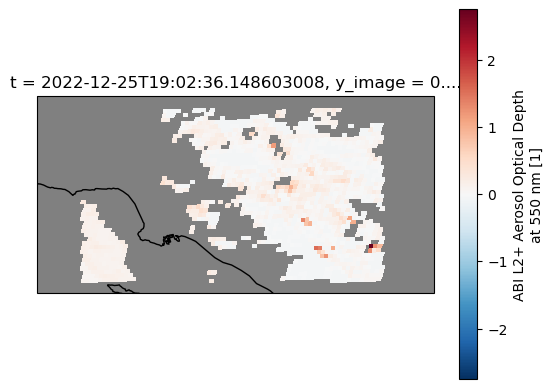

In [37]:
p = sub_ds['AOD'].plot(
    subplot_kws=dict(projection=crs_pc, facecolor="gray"),
    transform=crs_geo,
)
p.axes.coastlines()
#p.axes.set_extent(extents=extent, crs=crs_pc)
plt.show()

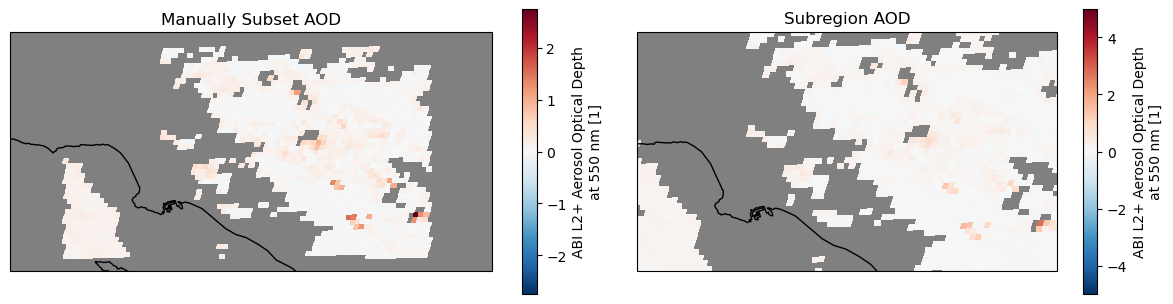

In [38]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, axes = plt.subplots(
    ncols=2,
    figsize=(12, 6),
    subplot_kw=dict(projection=crs_pc, facecolor="gray"),
    gridspec_kw={'width_ratios': [1.15, 1]}
)

# Plot 1: manually subregioned dataset
p1 = sub_ds['AOD'].plot(
    ax=axes[0],
    transform=crs_geo,
    add_colorbar=True,
    cbar_kwargs={'shrink': 0.5}
)
axes[0].coastlines()
#axes[0].set_extent(extents=extent, crs=crs_pc)
axes[0].set_title("Manually Subset AOD")

# Plot 2: full dataset, subregioned using cartopy's set_extent
p2 = ds['AOD'].plot(
    ax=axes[1],
    transform=crs_geo,
    add_colorbar=True,
    cbar_kwargs={'shrink': 0.5}
)
axes[1].coastlines()
axes[1].set_extent(extents=extent, crs=crs_pc)
axes[1].set_title("Subregion AOD")

plt.tight_layout()
plt.show()

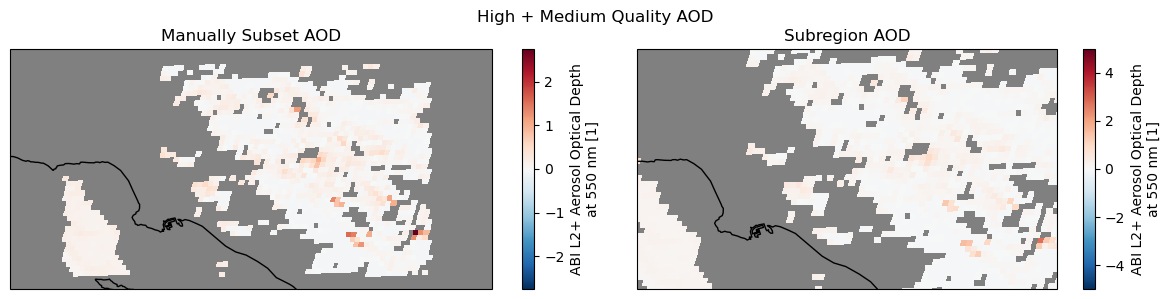

In [39]:
# using only top 2 quality data
# 0 = low, 1 = medium, 2 = high. Recommended to use medium + high for operational apps
fig, axes = plt.subplots(
    ncols=2,
    figsize=(12, 3),
    subplot_kw=dict(projection=crs_pc, facecolor="gray"),
    gridspec_kw={'width_ratios': [1.15, 1]}
)

plt.suptitle("High + Medium Quality AOD")

# Plot 1: manually subregioned dataset
p1 = sub_ds['AOD'].where(sub_ds['DQF'] >= 1).plot(
    ax=axes[0],
    transform=crs_geo,
    add_colorbar=True,
)
axes[0].coastlines()
#axes[0].set_extent(extents=extent, crs=crs_pc)
axes[0].set_title("Manually Subset AOD")

# Plot 2: full dataset, subregioned using cartopy's set_extent
p2 = ds['AOD'].where(ds['DQF'] >= 1).plot(
    ax=axes[1],
    transform=crs_geo,
    add_colorbar=True,
)
axes[1].coastlines()
axes[1].set_extent(extents=extent, crs=crs_pc)
axes[1].set_title("Subregion AOD")

plt.tight_layout()
plt.show()

## Summary

In [40]:
def get_latlon(ds):
    """Get lat/lon of all points. Modifies original xarray to contain lat/lon"""
    X, Y = np.meshgrid(ds.x, ds.y)
    a = ccrs.PlateCarree().transform_points(ds.FOV.crs, X, Y)
    lons, lats, _ = a[:, :, 0], a[:, :, 1], a[:, :, 2]

    ds.coords["lon"] = (("y", "x"), lons)
    ds.coords["lat"] = (("y", "x"), lats)
    return ds["lat"], ds["lon"]

get_latlon(ds)

sub_ds = ds.where(
    (ds.coords['lon'] >= lon_bottom) &
    (ds.coords['lon'] <= lon_top) &
    (ds.coords['lat'] >= lat_bottom) &
    (ds.coords['lat'] <= lat_top),
    drop=True
)

sub_ds

<xarray.Dataset> Size: 8MB
Dimensions:                                                 (y: 44, x: 82,
                                                             number_of_time_bounds: 2,
                                                             number_of_image_bounds: 2,
                                                             number_of_sunglint_angle_bounds: 2,
                                                             number_of_LZA_bounds: 2,
                                                             number_of_SZA_bounds: 2,
                                                             land_sensor_bands: 3,
                                                             sea_sensor_bands: 4,
                                                             latitude_bands: 18,
                                                             number_of_latitude_band_bounds: 2,
                                                             num_area_types: 2)
Coordinates: (12/18)
    t                                                       datetime64[ns] 8B ...
    y_image                                                 float32 4B 0.08624
    x_image                                                 float32 4B 0.0
    sunglint_angle                                          float32 4B 40.0
    retrieval_local_zenith_angle                            float32 4B 90.0
    quantitative_local_zenith_angle                         float32 4B 60.0
    ...                                                      ...
    time_coverage_start                                     <U22 88B '2022-12...
    time_coverage_end                                       <U22 88B '2022-12...
  * x                                                       (x) float32 328B ...
  * y                                                       (y) float32 176B ...
    lon                                                     (y, x) float64 29kB ...
    lat                                                     (y, x) float64 29kB ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_sunglint_angle_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                land_sensor_bands, sea_sensor_bands,
                                number_of_latitude_band_bounds, num_area_types
Data variables: (12/63)
    AOD                                                     (y, x) float32 14kB ...
    DQF                                                     (y, x) float32 14kB ...
    AE1                                                     (y, x) float32 14kB ...
    AE2                                                     (y, x) float32 14kB ...
    AE_DQF                                                  (y, x) float32 14kB ...
    time_bounds                                             (number_of_time_bounds, y, x) datetime64[ns] 58kB ...
    ...                                                      ...
    lat_band_max_aod550_sea                                 (latitude_bands, y, x) float32 260kB ...
    lat_band_mean_aod550_sea                                (latitude_bands, y, x) float32 260kB ...
    lat_band_std_dev_aod550_sea                             (latitude_bands, y, x) float32 260kB ...
    percent_uncorrectable_GRB_errors                        (y, x) float32 14kB ...
    percent_uncorrectable_L0_errors                         (y, x) float32 14kB ...
    filename                                                (y, x) object 29kB ...
Attributes: (12/26)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    processing_level:          National Aeronautics 

# Averaging all AODs into one hour
- Get all data within an hour (`goes2go.data.goes_timerange()`)
- Stack the data (`xarray.DataArray.stack()`)?
- Average each pixel across the time dimension (`np.nanmean()`) into one image
- Subregion the data (our custom functions)
- Plot

Extra:
- Stack only data with quality 2+

In [41]:
from goes2go.data import goes_timerange

ds = goes_timerange(
    start=datetime(2022, 12, 25, 19, 0),
    end=datetime(2022, 12, 25, 19, 59),
    satellite='goes18',
    product="ABI-L2-AODC",
    return_as='xarray',
    max_cpus=12,
    verbose=False,
)

ds

📦 Finished downloading [12] files to [/home/mgraca/data/noaa-goes18/ABI-L2-AODC].
📖💽 Reading (12/12) file from LOCAL COPY [/home/mgraca/data/noaa-goes18/ABI-L2-AODC/2022/359/19/OR_ABI-L2-AODC-M6_G18_s20223591956175_e20223591958548_c20223592001274.nc].         concatenate Datasets

<xarray.Dataset> Size: 900MB
Dimensions:                                                 (t: 12, y: 1500,
                                                             x: 2500,
                                                             number_of_time_bounds: 2,
                                                             number_of_image_bounds: 2,
                                                             number_of_sunglint_angle_bounds: 2,
                                                             number_of_LZA_bounds: 2,
                                                             number_of_SZA_bounds: 2,
                                                             land_sensor_bands: 3,
                                                             sea_sensor_bands: 4,
                                                             latitude_bands: 18,
                                                             number_of_latitude_band_bounds: 2,
                                                             num_area_types: 2)
Coordinates: (12/16)
  * t                                                       (t) datetime64[ns] 96B ...
  * y                                                       (y) float32 6kB 0...
  * x                                                       (x) float32 10kB ...
    y_image                                                 float32 4B 0.08624
    x_image                                                 float32 4B 0.0
    sunglint_angle                                          float32 4B 40.0
    ...                                                      ...
    aod_product_wavelength                                  float32 4B 0.55
  * latitude_bands                                          (latitude_bands) float32 72B ...
    dataset_name                                            (t) <U72 3kB 'OR_...
    date_created                                            (t) <U22 1kB '202...
    time_coverage_start                                     (t) <U22 1kB '202...
    time_coverage_end                                       (t) <U22 1kB '202...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_sunglint_angle_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                land_sensor_bands, sea_sensor_bands,
                                number_of_latitude_band_bounds, num_area_types
Data variables: (12/63)
    AOD                                                     (t, y, x) float32 180MB ...
    DQF                                                     (t, y, x) float32 180MB ...
    AE1                                                     (t, y, x) float32 180MB ...
    AE2                                                     (t, y, x) float32 180MB ...
    AE_DQF                                                  (t, y, x) float32 180MB ...
    time_bounds                                             (t, number_of_time_bounds) datetime64[ns] 192B ...
    ...                                                      ...
    lat_band_max_aod550_sea                                 (t, latitude_bands) float32 864B ...
    lat_band_mean_aod550_sea                                (t, latitude_bands) float32 864B ...
    lat_band_std_dev_aod550_sea                             (t, latitude_bands) float32 864B ...
    percent_uncorrectable_GRB_errors                        (t) float32 48B 0...
    percent_uncorrectable_L0_errors                         (t) float32 48B 0...
    filename                                                (t) <U108 5kB 'no...
Attributes: (12/26)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES


In [42]:
ds['AOD_mean'] = ds['AOD'].mean(dim='t', skipna=True)
ds['AOD_mean']

<xarray.DataArray 'AOD_mean' (y: 1500, x: 2500)> Size: 15MB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.18006265, 0.16519007, 0.17022647, ..., 0.31847522, 0.32879192,
        0.372651  ],
       [0.18247077, 0.18957953, 0.17354007, ..., 0.33630177, 0.34164461,
        0.29061484],
       [0.16851647, 0.18323494, 0.15989217, ..., 0.28300425, 0.38686854,
        0.34973824]], dtype=float32)
Coordinates:
  * y                                (y) float32 6kB 0.1282 0.1282 ... 0.04427
  * x                                (x) float32 10kB -0.06997 ... 0.06997
    y_image                          float32 4B 0.08624
    x_image                          float32 4B 0.0
    sunglint_angle                   float32 4B 40.0
    retrieval_local_zenith_angle     float32 4B 90.0
    quantitative_local_zenith_angle  float32 4B 60.0
    retrieval_solar_zenith_angle     float32 4B 90.0
    quantitative_solar_zenith_angle  float32 4B 80.0
    aod_product_wavelength           float32 4B 0.55

In [43]:
crs_geo = ds.FOV.crs
crs_pc = ccrs.PlateCarree()

sat_height = ds['goes_imager_projection'].attrs['perspective_point_height']
ds.coords['x'] = ds.coords['x'] * sat_height
ds.coords['y'] = ds.coords['y'] * sat_height

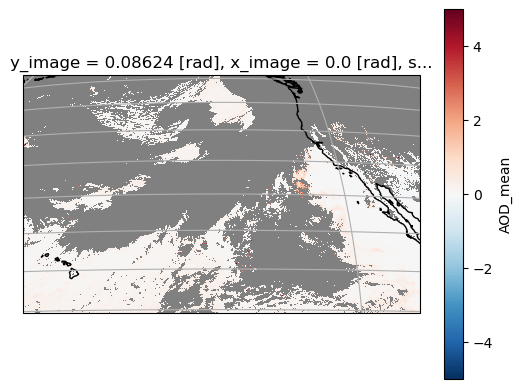

In [44]:
p = ds['AOD_mean'].plot(
    subplot_kws=dict(projection=crs_geo, facecolor="gray"),
    transform=crs_geo,
)
p.axes.gridlines(crs=crs_pc)
p.axes.coastlines()
plt.show()

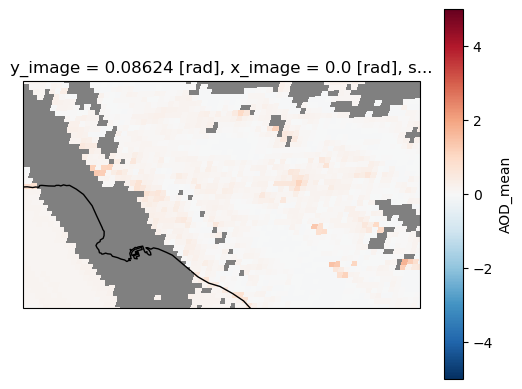

In [45]:
p = ds['AOD_mean'].plot(
    subplot_kws=dict(projection=crs_pc, facecolor="gray"),
    transform=crs_geo,
)
p.axes.coastlines()
p.axes.set_extent(extents=extent, crs=crs_pc)
plt.show()

In [46]:
p.cmap.name

'RdBu_r'

In [47]:
scan_start = datetime.strptime(str(ds.time_coverage_start.values[0]), '%Y-%m-%dT%H:%M:%S.%fZ')
scan_end = datetime.strptime(str(ds.time_coverage_start.values[-1]), '%Y-%m-%dT%H:%M:%S.%fZ')
scan_start, scan_end

(datetime.datetime(2022, 12, 25, 19, 1, 17, 500000),
 datetime.datetime(2022, 12, 25, 19, 56, 17, 500000))

In [48]:
ds['AOD'].attrs

{'long_name': 'ABI L2+ Aerosol Optical Depth at 550 nm',
 'standard_name': 'atmosphere_extinction_optical_thickness_due_to_ambient_aerosol',
 'valid_range': array([    0, 65530], dtype=uint16),
 'units': '1',
 'resolution': 'y: 0.000056 rad x: 0.000056 rad',
 'grid_mapping': 'goes_imager_projection',
 'cell_methods': 'sunglint_angle: point (no pixel produced over sea only) retrieval_local_zenith_angle: point (good or degraded quality pixel produced) quantitative_local_zenith_angle: point (good quality pixel produced) retrieval_solar_zenith_angle: point (good or degraded quality pixel produced) quantitative_solar_zenith_angle: point (good quality pixel produced) t: point area: point',
 'ancillary_variables': 'DQF'}

In [49]:
ds['AOD'].min().item(), ds['AOD'].max().item()

(-0.05000000074505806, 4.999972820281982)

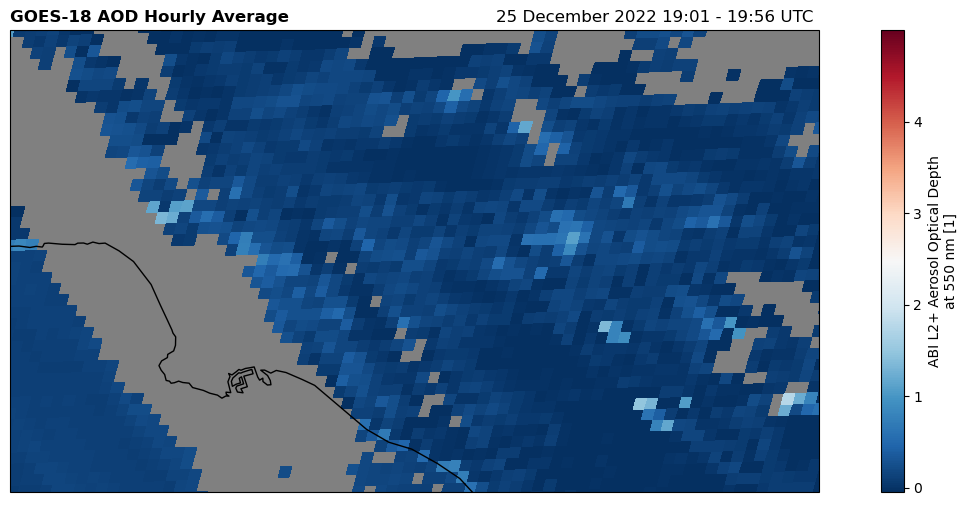

In [50]:
ds['AOD_mean'].attrs['long_name'] = ds['AOD'].attrs['long_name']
ds['AOD_mean'].attrs['units'] = ds['AOD'].attrs['units']
p = ds['AOD_mean'].plot(
    subplot_kws=dict(projection=crs_pc, facecolor='gray'),
    transform=crs_geo,
    figsize=(16, 6),
    vmin=float(ds['AOD_mean'].min()),
    vmax=float(ds['AOD_mean'].max()),
    cmap='RdBu_r'
)
p.axes.set_title('') # reset xr's default plotting
p.axes.set_title('GOES-18 AOD Hourly Average', fontweight='bold', loc='left')
p.axes.set_title(f"{scan_start.strftime('%d %B %Y %H:%M')} - {scan_end.strftime('%H:%M UTC ')}", loc='right')
p.axes.coastlines()
p.axes.set_extent(extents=extent, crs=crs_pc);

## Summary

In [51]:
from goes2go.data import goes_timerange

ds = goes_timerange(
    start=datetime(2022, 12, 25, 19, 0),
    end=datetime(2022, 12, 25, 19, 59),
    satellite='goes18',
    product="ABI-L2-AODC",
    return_as='xarray',
    max_cpus=12,
    verbose=False,
)

ds

📦 Finished downloading [12] files to [/home/mgraca/data/noaa-goes18/ABI-L2-AODC].
📖💽 Reading (12/12) file from LOCAL COPY [/home/mgraca/data/noaa-goes18/ABI-L2-AODC/2022/359/19/OR_ABI-L2-AODC-M6_G18_s20223591956175_e20223591958548_c20223592001274.nc].         concatenate Datasets

<xarray.Dataset> Size: 900MB
Dimensions:                                                 (t: 12, y: 1500,
                                                             x: 2500,
                                                             number_of_time_bounds: 2,
                                                             number_of_image_bounds: 2,
                                                             number_of_sunglint_angle_bounds: 2,
                                                             number_of_LZA_bounds: 2,
                                                             number_of_SZA_bounds: 2,
                                                             land_sensor_bands: 3,
                                                             sea_sensor_bands: 4,
                                                             latitude_bands: 18,
                                                             number_of_latitude_band_bounds: 2,
                                                             num_area_types: 2)
Coordinates: (12/16)
  * t                                                       (t) datetime64[ns] 96B ...
  * y                                                       (y) float32 6kB 0...
  * x                                                       (x) float32 10kB ...
    y_image                                                 float32 4B 0.08624
    x_image                                                 float32 4B 0.0
    sunglint_angle                                          float32 4B 40.0
    ...                                                      ...
    aod_product_wavelength                                  float32 4B 0.55
  * latitude_bands                                          (latitude_bands) float32 72B ...
    dataset_name                                            (t) <U72 3kB 'OR_...
    date_created                                            (t) <U22 1kB '202...
    time_coverage_start                                     (t) <U22 1kB '202...
    time_coverage_end                                       (t) <U22 1kB '202...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_sunglint_angle_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                land_sensor_bands, sea_sensor_bands,
                                number_of_latitude_band_bounds, num_area_types
Data variables: (12/63)
    AOD                                                     (t, y, x) float32 180MB ...
    DQF                                                     (t, y, x) float32 180MB ...
    AE1                                                     (t, y, x) float32 180MB ...
    AE2                                                     (t, y, x) float32 180MB ...
    AE_DQF                                                  (t, y, x) float32 180MB ...
    time_bounds                                             (t, number_of_time_bounds) datetime64[ns] 192B ...
    ...                                                      ...
    lat_band_max_aod550_sea                                 (t, latitude_bands) float32 864B ...
    lat_band_mean_aod550_sea                                (t, latitude_bands) float32 864B ...
    lat_band_std_dev_aod550_sea                             (t, latitude_bands) float32 864B ...
    percent_uncorrectable_GRB_errors                        (t) float32 48B 0...
    percent_uncorrectable_L0_errors                         (t) float32 48B 0...
    filename                                                (t) <U108 5kB 'no...
Attributes: (12/26)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES


In [52]:
h = ds['goes_imager_projection'].attrs['perspective_point_height']
ds.coords['x'] = ds.coords['x'] * h
ds.coords['y'] = ds.coords['y'] * h
get_latlon(ds)

sub_ds = ds.where(
    (ds.coords['lon'] >= lon_bottom) &
    (ds.coords['lon'] <= lon_top) &
    (ds.coords['lat'] >= lat_bottom) &
    (ds.coords['lat'] <= lat_top),
    drop=True
)

sub_ds

<xarray.Dataset> Size: 94MB
Dimensions:                                                 (t: 12, y: 44,
                                                             x: 82,
                                                             number_of_time_bounds: 2,
                                                             number_of_image_bounds: 2,
                                                             number_of_sunglint_angle_bounds: 2,
                                                             number_of_LZA_bounds: 2,
                                                             number_of_SZA_bounds: 2,
                                                             land_sensor_bands: 3,
                                                             sea_sensor_bands: 4,
                                                             latitude_bands: 18,
                                                             number_of_latitude_band_bounds: 2,
                                                             num_area_types: 2)
Coordinates: (12/18)
  * t                                                       (t) datetime64[ns] 96B ...
    y_image                                                 float32 4B 0.08624
    x_image                                                 float32 4B 0.0
    sunglint_angle                                          float32 4B 40.0
    retrieval_local_zenith_angle                            float32 4B 90.0
    quantitative_local_zenith_angle                         float32 4B 60.0
    ...                                                      ...
    time_coverage_start                                     (t) <U22 1kB '202...
    time_coverage_end                                       (t) <U22 1kB '202...
  * x                                                       (x) float32 328B ...
  * y                                                       (y) float32 176B ...
    lon                                                     (y, x) float64 29kB ...
    lat                                                     (y, x) float64 29kB ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_sunglint_angle_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                land_sensor_bands, sea_sensor_bands,
                                number_of_latitude_band_bounds, num_area_types
Data variables: (12/63)
    AOD                                                     (t, y, x) float32 173kB ...
    DQF                                                     (t, y, x) float32 173kB ...
    AE1                                                     (t, y, x) float32 173kB ...
    AE2                                                     (t, y, x) float32 173kB ...
    AE_DQF                                                  (t, y, x) float32 173kB ...
    time_bounds                                             (t, number_of_time_bounds, y, x) datetime64[ns] 693kB ...
    ...                                                      ...
    lat_band_max_aod550_sea                                 (t, latitude_bands, y, x) float32 3MB ...
    lat_band_mean_aod550_sea                                (t, latitude_bands, y, x) float32 3MB ...
    lat_band_std_dev_aod550_sea                             (t, latitude_bands, y, x) float32 3MB ...
    percent_uncorrectable_GRB_errors                        (t, y, x) float32 173kB ...
    percent_uncorrectable_L0_errors                         (t, y, x) float32 173kB ...
    filename                                                (t, y, x) object 346kB ...
Attributes: (12/26)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    projec

In [53]:
sub_ds['AOD_mean'] = sub_ds['AOD'].where(sub_ds['DQF'] >= 1).mean(dim='t', skipna=True)
sub_ds['AOD_mean']

<xarray.DataArray 'AOD_mean' (y: 44, x: 82)> Size: 14kB
array([[ 0.05098713,  0.08624209,  0.0954636 , ...,         nan,
                nan,         nan],
       [        nan,  0.07495279,  0.04740384, ...,         nan,
                nan,         nan],
       [        nan,         nan,  0.12415561, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ..., -0.03848595,
        -0.01747426,  0.05192469],
       [        nan,         nan,         nan, ...,  0.05627216,
         0.03842085,  0.05000675],
       [        nan,         nan,         nan, ...,  0.07793887,
         0.07960636,  0.08752   ]], dtype=float32)
Coordinates:
    y_image                          float32 4B 0.08624
    x_image                          float32 4B 0.0
    sunglint_angle                   float32 4B 40.0
    retrieval_local_zenith_angle     float32 4B 90.0
    quantitative_local_zenith_angle  float32 4B 60.0
    retrieval_solar_zenith_angle     float32 4B 90.0
    quantitative_solar_zenith_angle  float32 4B 80.0
    aod_product_wavelength           float32 4B 0.55
  * x                                (x) float32 328B 1.58e+06 ... 1.742e+06
  * y                                (y) float32 176B 3.448e+06 ... 3.362e+06
    lon                              (y, x) float64 29kB -118.7 ... -117.0
    lat                              (y, x) float64 29kB 34.5 34.5 ... 33.51

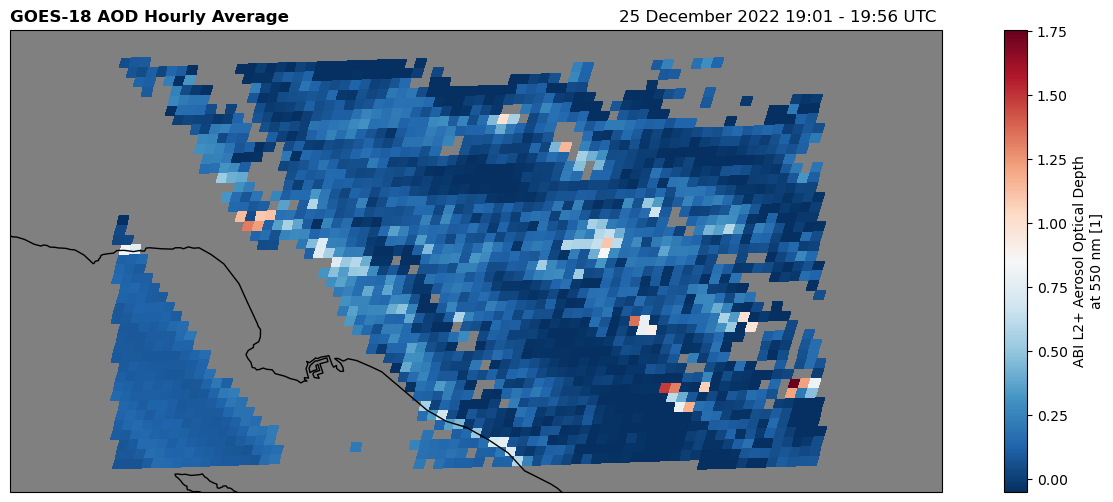

In [54]:
sub_ds['AOD_mean'].attrs['long_name'] = sub_ds['AOD'].attrs['long_name']
sub_ds['AOD_mean'].attrs['units'] = sub_ds['AOD'].attrs['units']
p = sub_ds['AOD_mean'].plot(
    subplot_kws=dict(projection=crs_pc, facecolor='gray'),
    transform=crs_geo,
    figsize=(16, 6),
    vmin=float(sub_ds['AOD_mean'].min()),
    vmax=float(sub_ds['AOD_mean'].max()),
    cmap='RdBu_r'
)
p.axes.set_title('') # reset xr's default plotting
p.axes.set_title('GOES-18 AOD Hourly Average', fontweight='bold', loc='left')
p.axes.set_title(f"{scan_start.strftime('%d %B %Y %H:%M')} - {scan_end.strftime('%H:%M UTC ')}", loc='right')
p.axes.coastlines()
#p.axes.set_extent(extents=extent, crs=crs_pc);

# Case study: Palisades
1-10-25

In [55]:
# step 1: ingest data
from goes2go.data import goes_timerange
ds = goes_timerange(
    start="2025-01-10 00:00",
    end="2025-01-10 00:59",
    satellite='goes18',
    product="ABI-L2-AODC",
    return_as='xarray',
    max_cpus=12,
    verbose=False,
)

# step 2: calculate lat/lon coordinate system
h = ds['goes_imager_projection'].attrs['perspective_point_height']
ds.coords['x'] = ds.coords['x'] * h
ds.coords['y'] = ds.coords['y'] * h
get_latlon(ds)

# step 3: create subregion from data using lat/lon 
sub_ds = ds.where(
    (ds.coords['lon'] >= lon_bottom) &
    (ds.coords['lon'] <= lon_top) &
    (ds.coords['lat'] >= lat_bottom) &
    (ds.coords['lat'] <= lat_top),
    drop=True
)

# step 4: filter data by quality, then compute the mean across time
sub_ds['AOD_mean'] = sub_ds['AOD'].where(sub_ds['DQF'] >= 1).mean(dim='t', skipna=True)

📦 Finished downloading [12] files to [/home/mgraca/data/noaa-goes18/ABI-L2-AODC].
📖💽 Reading (10/12) file from LOCAL COPY [/home/mgraca/data/noaa-goes18/ABI-L2-AODC/2025/010/00/OR_ABI-L2-AODC-M6_G18_s20250100046175_e20250100048548_c20250100052197.nc].         concatenate Datasets

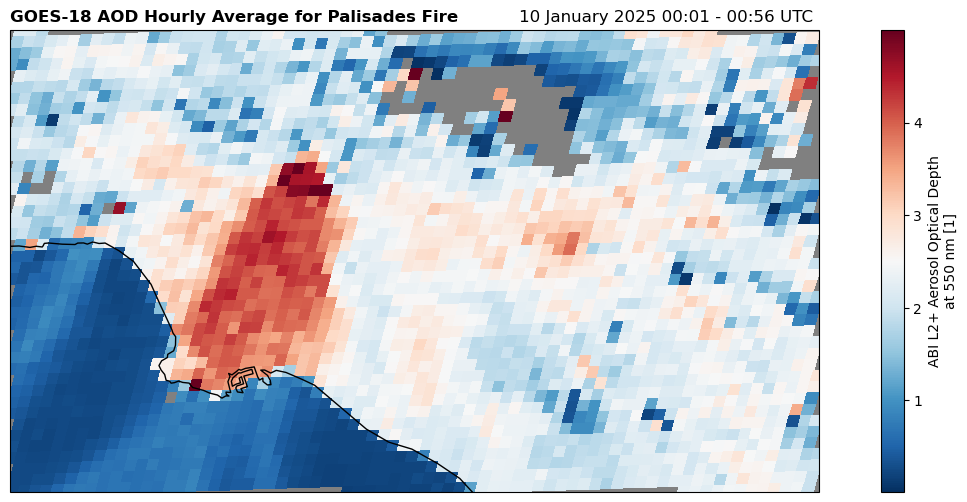

In [56]:
# step 5: prep xarray for plotting
scan_start = datetime.strptime(str(ds.time_coverage_start.values[0]), '%Y-%m-%dT%H:%M:%S.%fZ')
scan_end = datetime.strptime(str(ds.time_coverage_start.values[-1]), '%Y-%m-%dT%H:%M:%S.%fZ')

sub_ds['AOD_mean'].attrs['long_name'] = sub_ds['AOD'].attrs['long_name']
sub_ds['AOD_mean'].attrs['units'] = sub_ds['AOD'].attrs['units']

p = sub_ds['AOD_mean'].plot(
    subplot_kws=dict(projection=crs_pc, facecolor='gray'),
    transform=crs_geo,
    figsize=(16, 6),
    vmin=float(sub_ds['AOD_mean'].min()),
    vmax=float(sub_ds['AOD_mean'].max()),
    cmap='RdBu_r'
)
p.axes.set_title('') # reset xr's default plotting
p.axes.set_title('GOES-18 AOD Hourly Average for Palisades Fire', fontweight='bold', loc='left')
p.axes.set_title(f"{scan_start.strftime('%d %B %Y %H:%M')} - {scan_end.strftime('%H:%M UTC ')}", loc='right')
p.axes.coastlines()
p.axes.set_extent(extents=extent, crs=crs_pc);

# Now attempting to convert data into numpy array

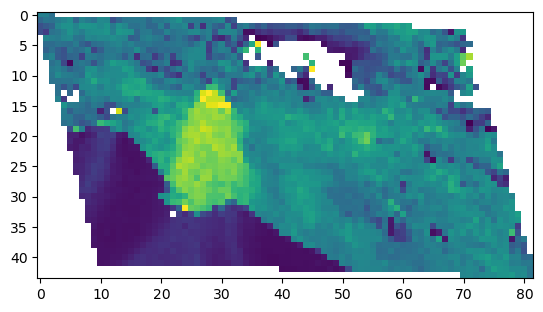

In [57]:
plt.imshow(sub_ds['AOD_mean'].data)

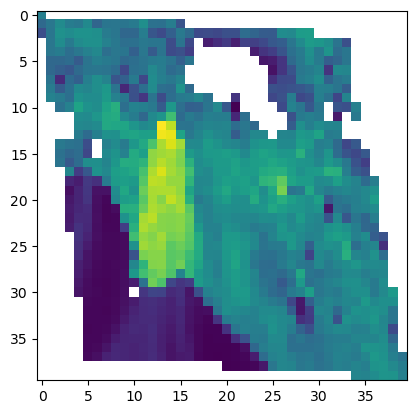

In [130]:
import cv2
a = cv2.resize(sub_ds['AOD_mean'].data, (40, 40))
plt.imshow(a)

In [131]:
import xesmf as xe
import xarray as xr

# remove a touch of padding, otherwise dummy values appear on the grid on the edges
target_lon = np.linspace(lon_bottom+0.05, lon_top-0.05, 40)
target_lat = np.linspace(lat_bottom+0.05, lat_top-0.05, 40)

target_grid = xr.Dataset(
    {
        "lon": (["lon"], target_lon),
        "lat": (["lat"], target_lat),
    }
)

target_grid

<xarray.Dataset> Size: 640B
Dimensions:  (lon: 40, lat: 40)
Coordinates:
  * lon      (lon) float64 320B -118.7 -118.7 -118.6 ... -117.1 -117.1 -117.0
  * lat      (lat) float64 320B 33.55 33.57 33.6 33.62 ... 34.4 34.43 34.45
Data variables:
    *empty*

In [132]:
sub_ds.isel(t=0)

<xarray.Dataset> Size: 8MB
Dimensions:                                                  (y: 44, x: 82,
                                                              number_of_time_bounds: 2,
                                                              number_of_image_bounds: 2,
                                                              number_of_sunglint_angle_bounds: 2,
                                                              number_of_LZA_bounds: 2,
                                                              number_of_SZA_bounds: 2,
                                                              land_sensor_bands: 3,
                                                              water_sensor_bands: 4,
                                                              latitude_bands: 18,
                                                              number_of_latitude_band_bounds: 2,
                                                              num_area_types: 2)
Coordinates: (12/18)
    t                                                        datetime64[ns] 8B ...
    y_image                                                  float32 4B 0.08624
    x_image                                                  float32 4B 0.0
    sunglint_angle                                           float32 4B 36.0
    retrieval_local_zenith_angle                             float32 4B 90.0
    quantitative_local_zenith_angle                          float32 4B 78.5
    ...                                                       ...
    time_coverage_start                                      <U22 88B '2025-0...
    time_coverage_end                                        <U22 88B '2025-0...
  * x                                                        (x) float32 328B ...
  * y                                                        (y) float32 176B ...
    lon                                                      (y, x) float64 29kB ...
    lat                                                      (y, x) float64 29kB ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_sunglint_angle_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                land_sensor_bands, water_sensor_bands,
                                number_of_latitude_band_bounds, num_area_types
Data variables: (12/65)
    AOD                                                      (y, x) float32 14kB ...
    DQF                                                      (y, x) float32 14kB ...
    AE1                                                      (y, x) float32 14kB ...
    AE2                                                      (y, x) float32 14kB ...
    AE_DQF                                                   (y, x) float32 14kB ...
    time_bounds                                              (number_of_time_bounds, y, x) datetime64[ns] 58kB ...
    ...                                                       ...
    processing_parm_version_container                        (y, x) float64 29kB ...
    algorithm_product_version_container                      (y, x) float64 29kB ...
    percent_uncorrectable_GRB_errors                         (y, x) float32 14kB ...
    percent_uncorrectable_L0_errors                          (y, x) float32 14kB ...
    filename                                                 (y, x) object 29kB ...
    AOD_mean                                                 (y, x) float32 14kB ...
Attributes: (12/26)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    processing_level:          National Aeronautics and Space Ad

In [134]:
regridder = xe.Regridder(sub_ds['AOD_mean'], target_grid, method="bilinear")
print(regridder)
regridded_ds = regridder(sub_ds['AOD_mean'])
regridded_array = regridded_ds.values

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_44x82_40x40.nc 
Reuse pre-computed weights? False 
Input grid shape:           (44, 82) 
Output grid shape:          (40, 40) 
Periodic in longitude?      False


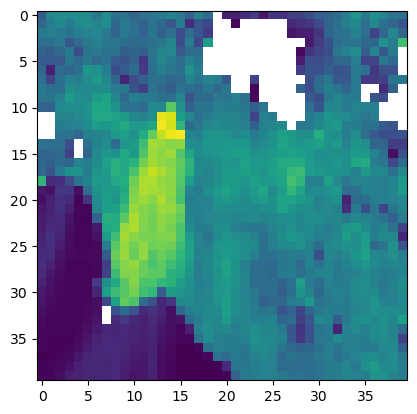

In [139]:
plt.imshow(np.rot90((regridded_array.T)));

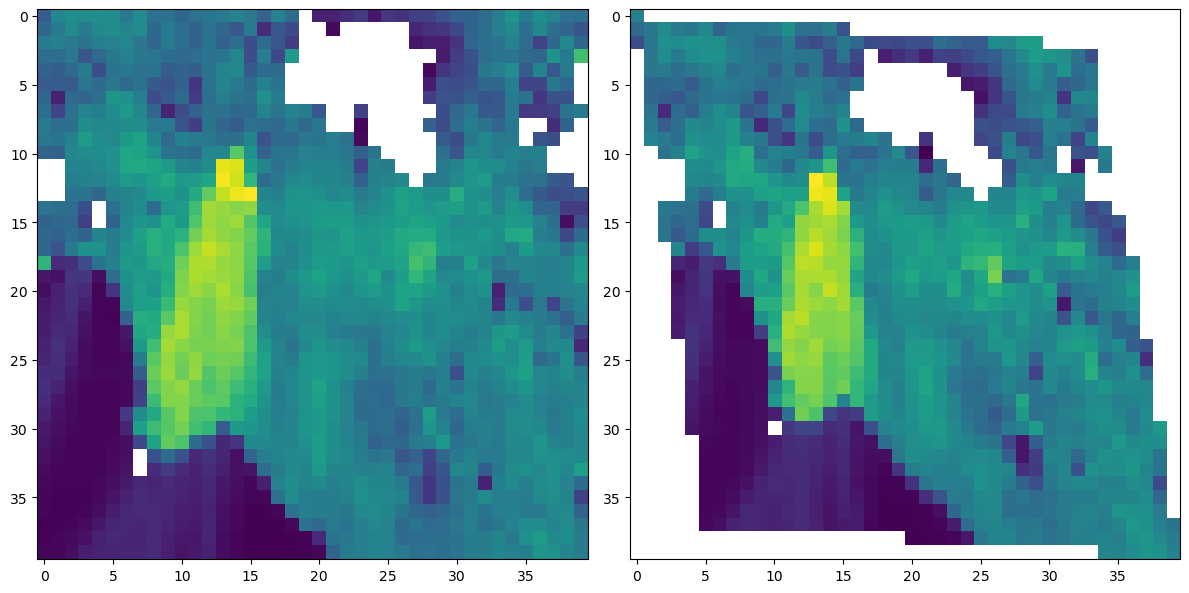

In [141]:
fig, axes = plt.subplots(
    ncols=2,
    figsize=(12, 6),
)

# Plot 1: manually subregioned dataset
axes[0].imshow(np.rot90((regridded_array.T)))

# Plot 2: full dataset, subregioned using cartopy's set_extent
axes[1].imshow(a)
plt.tight_layout()
plt.show()

# Data concerns
- 7MB per image
- 12 images per hour
- 24 hours in a day
- 365 days in a year
- 2 years

`7*12*24*365*2=1471680MB=1471.68GB=1.47TB`

I imagine we'd have to ingest by the day (2GB); goes2go has an option to just save the data into RAM and not onto the disk. If we forgo saving the entire .nc file and just save the 24-hour averaged data, that'd be 1471/24=61GB we can tank. However, if the data isn't in .nc, then it might be a different size; like it'll be much cheaper since it'll just be AOD data on the extent.

So I think the play may be to load the nc files onto ram a day at a time. I have no earthly idea how long this would take to do, though. Would need to test something like a week and extrapolate `(time*52*2)`

Also we should interpolate before reprojecting

Ingest logic:
- Request a day of data, save into RAM instead of disk
- Preprocess and save as npy
- Repeat